In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")

# print("Path to dataset files:", path)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene
import seaborn as sns
import joblib
train_df = pd.read_csv("dataset\customer_churn_dataset-training-master.csv")
test_df = pd.read_csv("dataset\customer_churn_dataset-testing-master.csv")

print(f"train_df : {train_df.shape} \ntest_df  : {test_df.shape}")

full_df = pd.concat([train_df, test_df], axis=0)

print(f"full_df : {full_df.shape}")


train_df : (440833, 12) 
test_df  : (64374, 12)
full_df : (505207, 12)


In [4]:
full_df_inf = full_df.info()
full_df_head = full_df.head()
full_df_desc = full_df.describe(include='all')

# full_df_head
# full_df_inf
full_df_desc

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206,505206.000000,505206.000000,505206.000000,505206.000000,505206,505206,505206.000000,505206.000000,505206.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,Standard,Annual,NaN,NaN,NaN
freq,NaN,NaN,280273,NaN,NaN,NaN,NaN,170630,198608,NaN,NaN,NaN
mean,200779.451782,39.704172,NaN,31.350435,15.714825,3.833317,13.496843,NaN,NaN,620.072766,14.610581,0.555203
std,137241.343095,12.670577,NaN,17.237482,8.619323,3.133603,8.451187,NaN,NaN,245.319256,8.608286,0.496944
min,1.000000,18.000000,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,NaN,16.000000,8.000000,1.000000,6.000000,NaN,NaN,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,NaN,32.000000,16.000000,3.000000,13.000000,NaN,NaN,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,NaN,46.000000,23.000000,6.000000,20.000000,NaN,NaN,824.000000,22.000000,1.000000


In [5]:
full_df_null = full_df.isnull().sum()
print(full_df_null)
print("-"*50)

full_df = full_df.dropna()
print(full_df.isnull().sum())
full_df

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
--------------------------------------------------
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


Index(['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


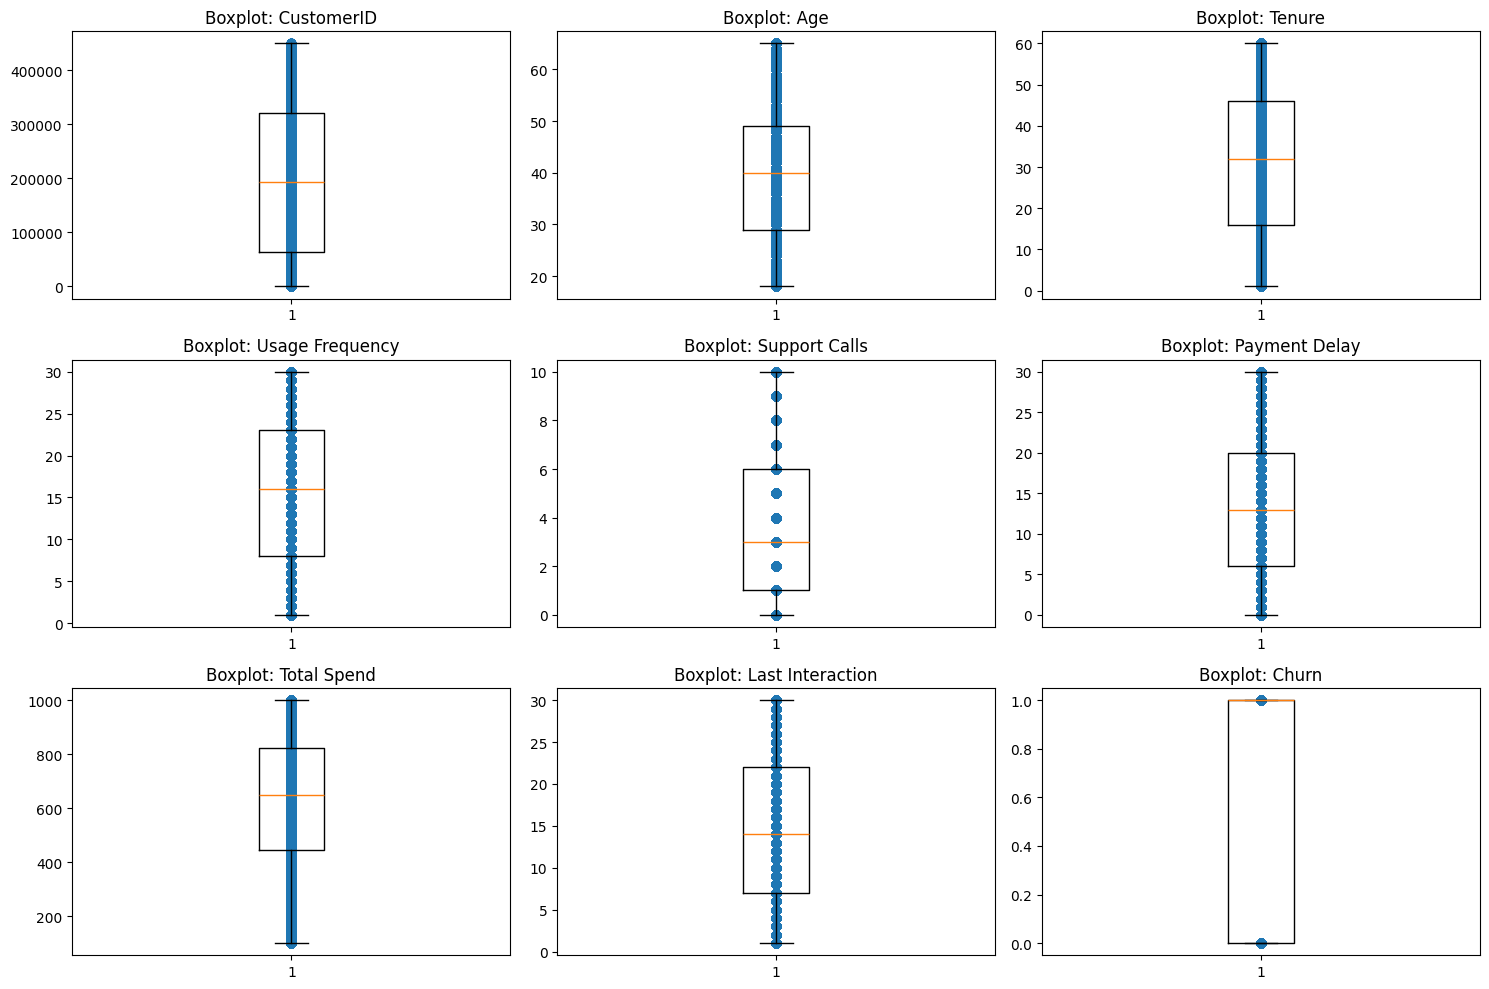

In [6]:
# Plot boxplots and scatter for numerical columns (outlier)
numerical_columns = full_df.select_dtypes(include=['float64']).columns
print(numerical_columns)

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    # print(train_df[column].shape)
    # Boxplot
    plt.subplot(3, 3, i+1)
    plt.scatter(np.ones(full_df[column].shape), full_df[column])
    plt.boxplot(full_df[column])
    plt.title(f"Boxplot: {column}")


plt.tight_layout()
plt.show()


Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')
Gender
Male      280273
Female    224933
Name: count, dtype: int64
------------------------------
Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64
------------------------------
Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64
------------------------------


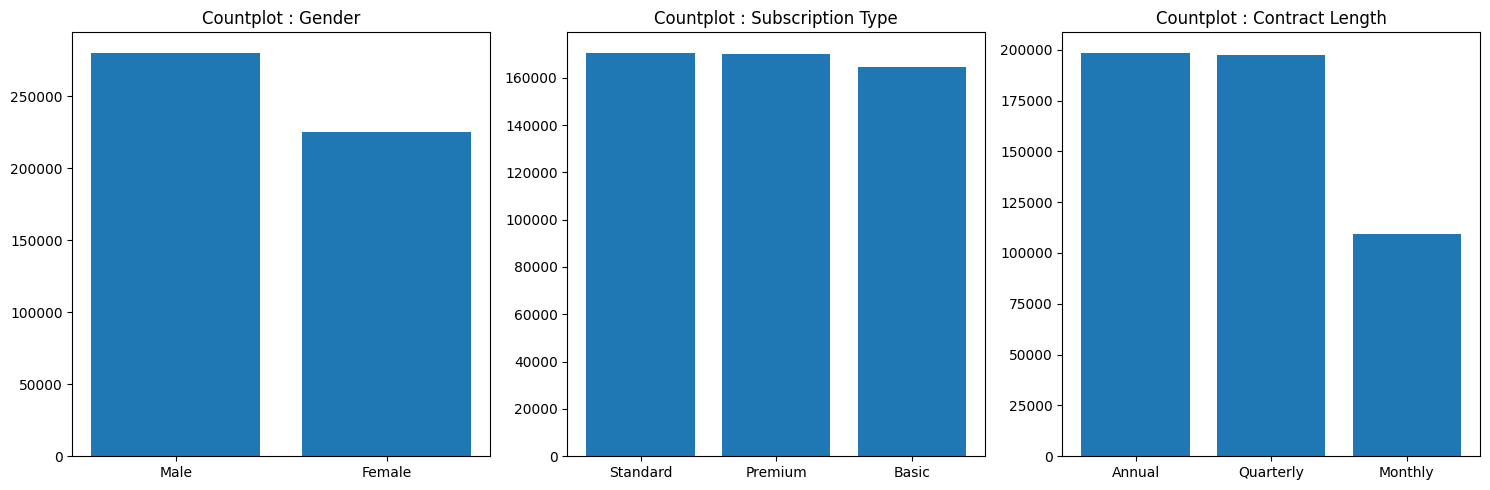

In [7]:
# Get categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns
print(categorical_columns)

# Create count plots for non-numeric columns
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns):
    print(full_df[column].value_counts())
    print("-"*30)
    plt.subplot(1, 3, i+1)
    plt.bar(full_df[column].value_counts().index, height=full_df[column].value_counts().values)
    plt.title(f"Countplot : {column}")

plt.tight_layout()
plt.show()


Gender
Female    64.89
Male      48.00
Name: Churn, dtype: float64
------------------------------
Subscription Type
Basic       56.89
Premium     54.75
Standard    54.97
Name: Churn, dtype: float64
------------------------------
Contract Length
Annual       46.09
Monthly      90.20
Quarterly    45.82
Name: Churn, dtype: float64
------------------------------


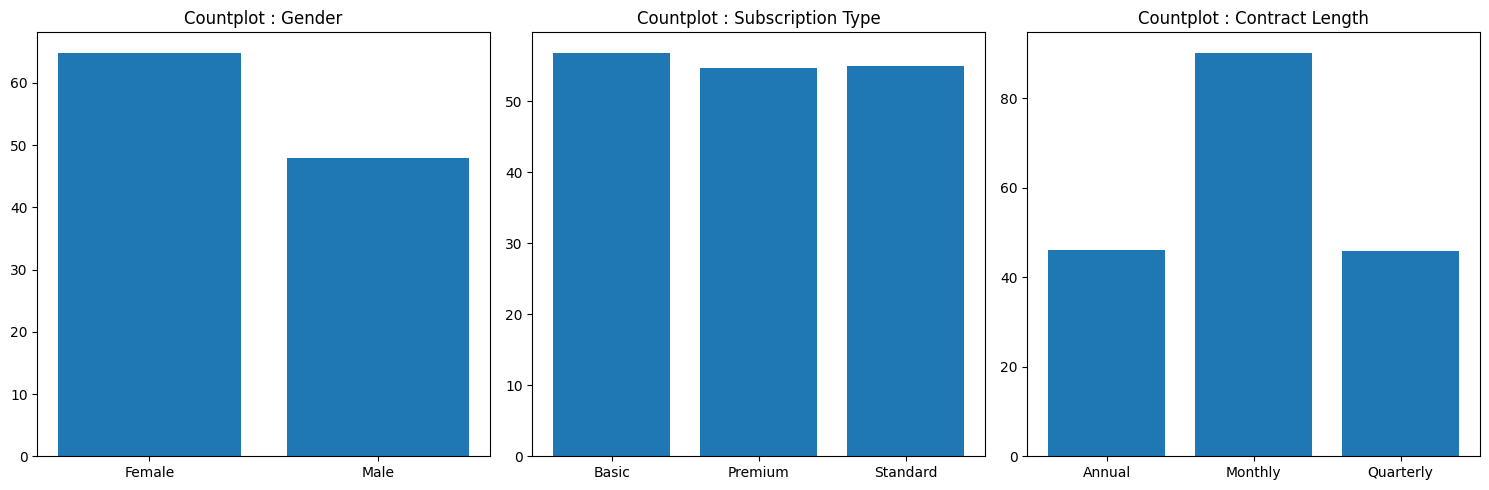

In [8]:
# Create count plots for non-numeric columns
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns):
    result_total = full_df.groupby(column)["Churn"].count()
    result_sum = full_df.groupby(column)["Churn"].sum()
    result = ((result_sum/result_total)*100).round(2)

    print(result)
    print("-"*30)

    plt.subplot(1, 3, i+1)
    plt.bar(result.index, height=result.values)
    plt.title(f"Countplot : {column}")

plt.tight_layout()
plt.show()

In [9]:
# check Normality Test and Homogeneity of Variance Test for numerical columns 
numerical_columns_drop_churn = numerical_columns[1:-1]
results = []

for column in numerical_columns_drop_churn:
    # Normality Test (Shapiro-Wilk)
    stat, p_normality = shapiro(full_df[column].dropna())
    result_norm = False if p_normality < 0.05 else True

    # Homogeneity of Variance Test (Levene's Test)ups
    group_0 = full_df[full_df['Churn'] == 0][column]
    group_1 = full_df[full_df['Churn'] == 1][column]
    stat_var, p_variance = levene(group_0, group_1)
    result_var = False if p_variance < 0.05 else True
    
    results.append({
        'Column': column,
        'Normality Test (p-value)': p_normality,
        'Normality Result': result_norm,
        'Variance Test (p-value)': p_variance,
        'Variance Result': result_var
    })

results_df = pd.DataFrame(results)

results_df["type_stat"] = "non-parametric"
results_df.loc[(results_df["Normality Result"] == True ) & (results_df["Variance Result"] == True), "type_stat"] = "parametric"


results_df

C:\Users\natta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 505206.
  res = hypotest_fun_out(*samples, **kwds)


,Column,Normality Test (p-value),Normality Result,Variance Test (p-value),Variance Result,type_stat
0,Age,8.248108e-108,False,0.000000e+00,False,non-parametric
1,Tenure,2.035724e-120,False,1.194704e-06,False,non-parametric
2,Usage Frequency,6.483676e-121,False,6.271615e-159,False,non-parametric
3,Support Calls,3.292976e-142,False,0.000000e+00,False,non-parametric
4,Payment Delay,3.176764e-115,False,0.000000e+00,False,non-parametric
5,Total Spend,1.115486e-120,False,0.000000e+00,False,non-parametric
6,Last Interaction,2.050060e-122,False,2.554827e-292,False,non-parametric


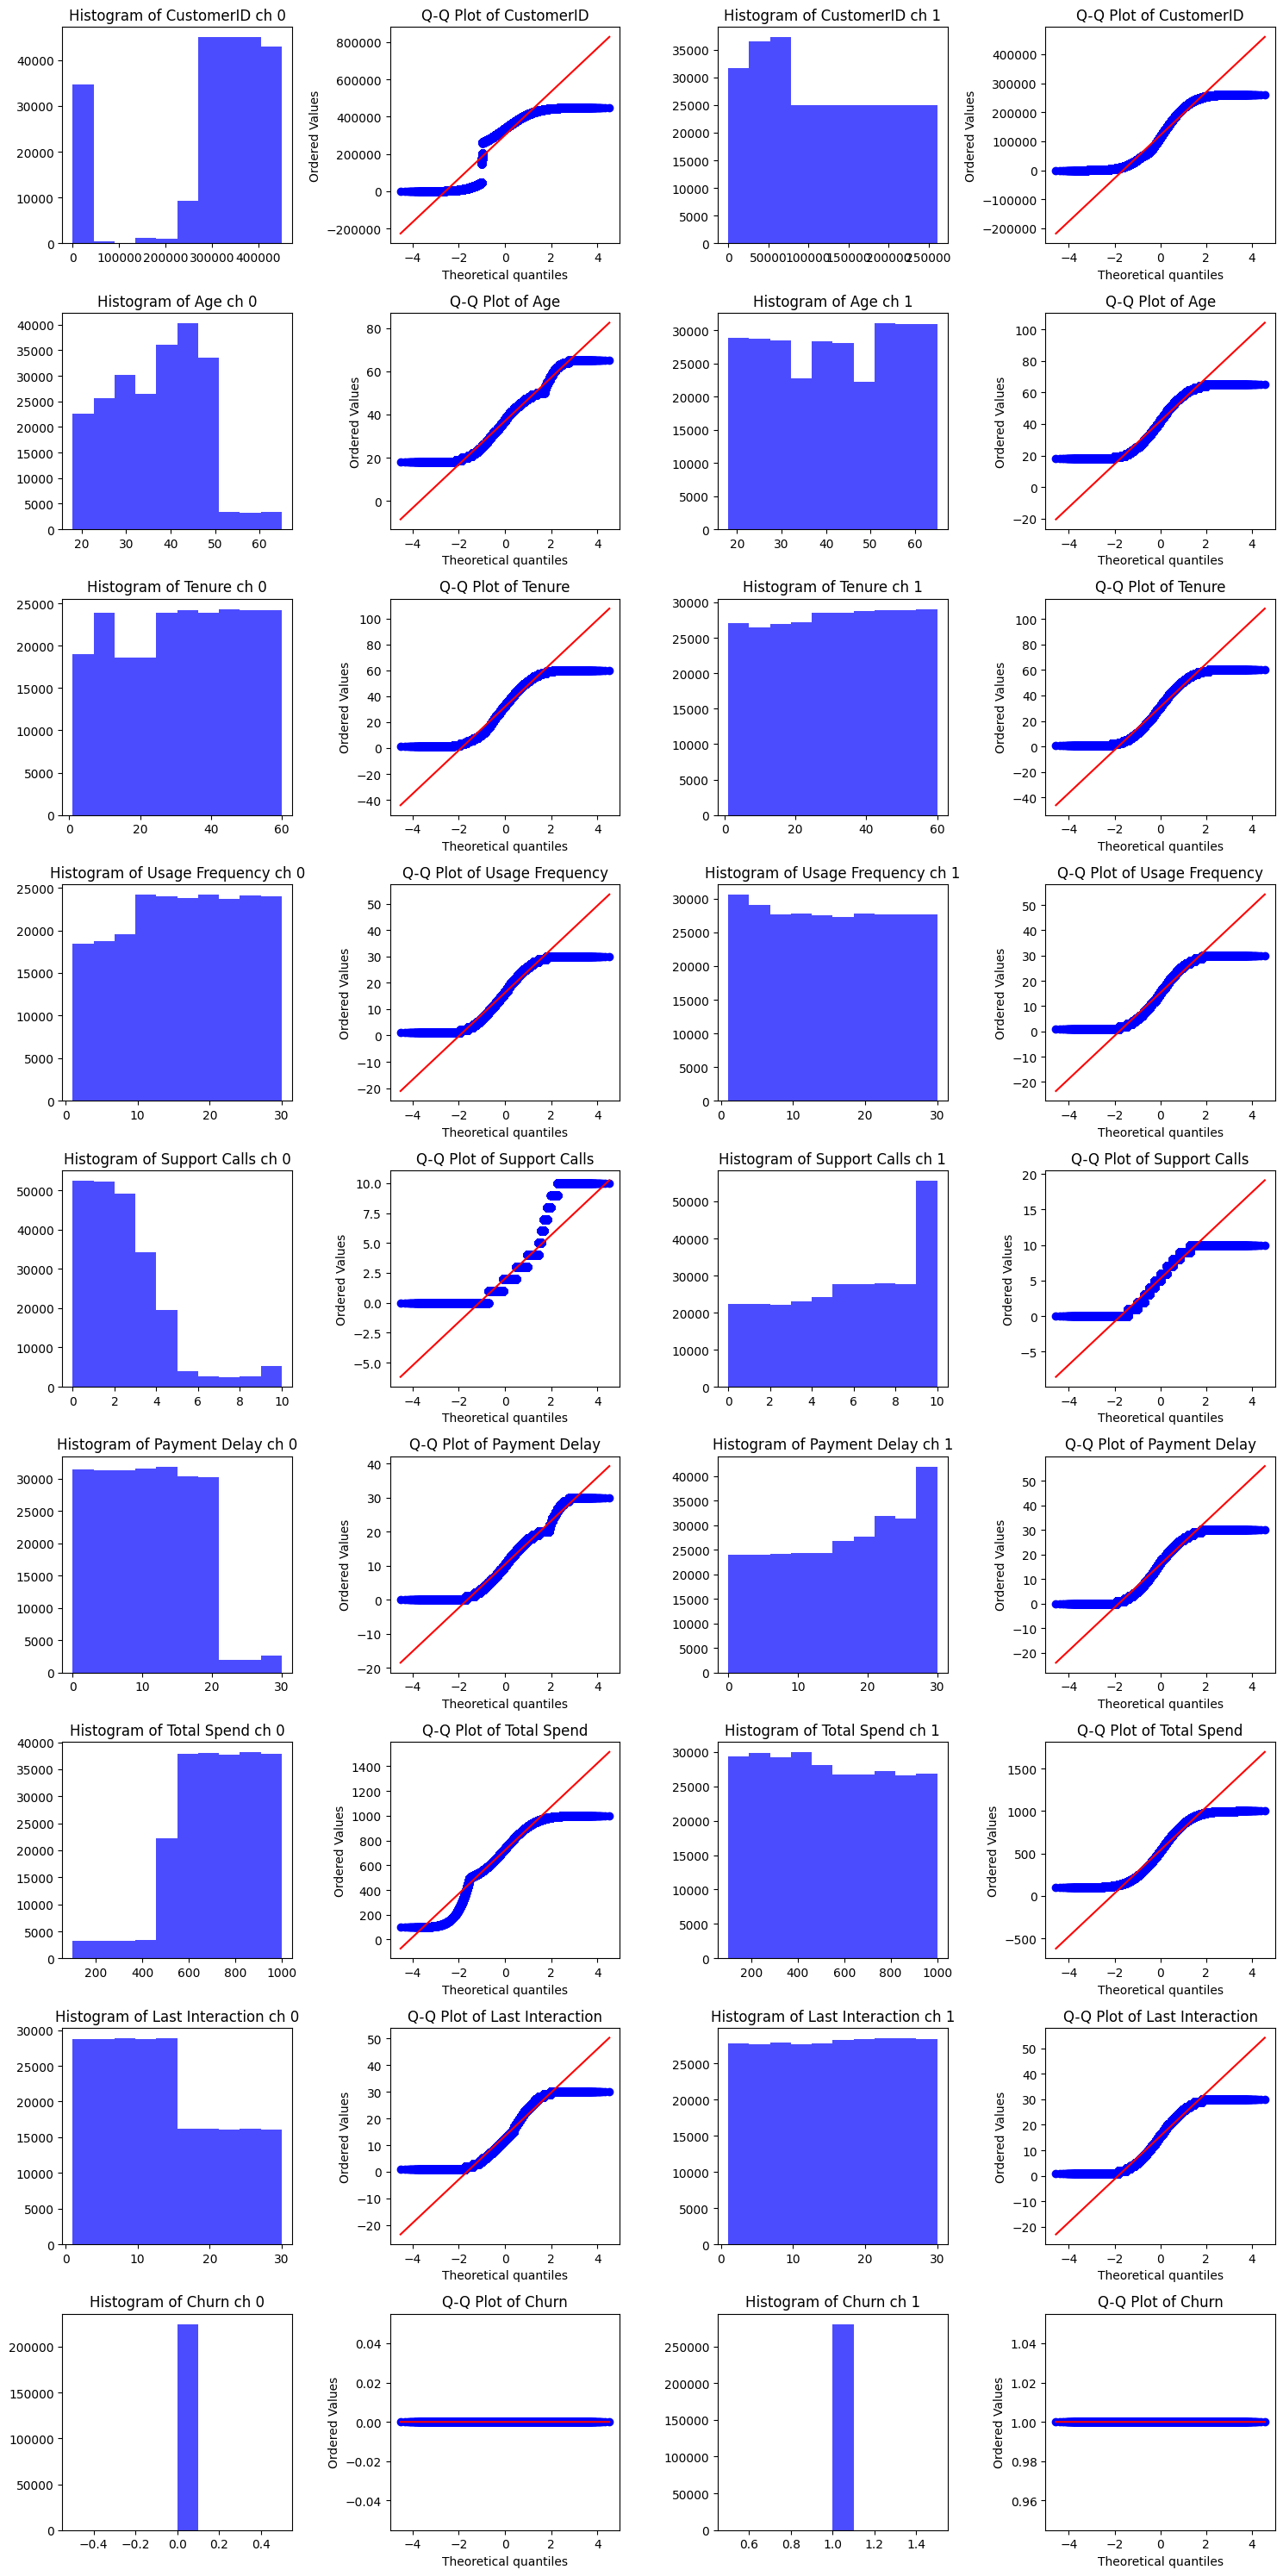

In [10]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Adjust the figure size
plt.figure(figsize=(15, 30))

# Loop through each numerical column
for i, column in enumerate(numerical_columns):
    # Create subplots: 9 rows, 2 columns
    plt.subplot(9, 4, 4*i+1)  # Histogram (odd numbered subplots)
    plt.hist(full_df[full_df['Churn'] == 0][column], bins=10, alpha=0.7, color='blue')
    plt.title(f'Histogram of {column} ch 0')

    plt.subplot(9, 4, 4*i+2)  # Q-Q plot (even numbered subplots)
    stats.probplot(full_df[full_df['Churn'] == 0][column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

        # Create subplots: 9 rows, 2 columns
    plt.subplot(9, 4, 4*i+3)  # Histogram (odd numbered subplots)
    plt.hist(full_df[full_df['Churn'] == 1][column], bins=10, alpha=0.7, color='blue')
    plt.title(f'Histogram of {column} ch 1')

    plt.subplot(9, 4, 4*i+4)  # Q-Q plot (even numbered subplots)
    stats.probplot(full_df[full_df['Churn'] == 1][column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


0 Age
Standard Deviation for Churn = 0 in Age: 103.481
Standard Deviation for Churn = 1 in Age: 195.685
--------------------------------------------------
1 Tenure
Standard Deviation for Churn = 0 in Tenure: 295.409
Standard Deviation for Churn = 1 in Tenure: 298.268
--------------------------------------------------
2 Usage Frequency
Standard Deviation for Churn = 0 in Usage Frequency: 71.248
Standard Deviation for Churn = 1 in Usage Frequency: 76.352
--------------------------------------------------
3 Support Calls
Standard Deviation for Churn = 0 in Support Calls: 4.013
Standard Deviation for Churn = 1 in Support Calls: 9.757
--------------------------------------------------
4 Payment Delay
Standard Deviation for Churn = 0 in Payment Delay: 42.323
Standard Deviation for Churn = 1 in Payment Delay: 80.745
--------------------------------------------------
5 Total Spend
Standard Deviation for Churn = 0 in Total Spend: 32420.14
Standard Deviation for Churn = 1 in Total Spend: 67608.7

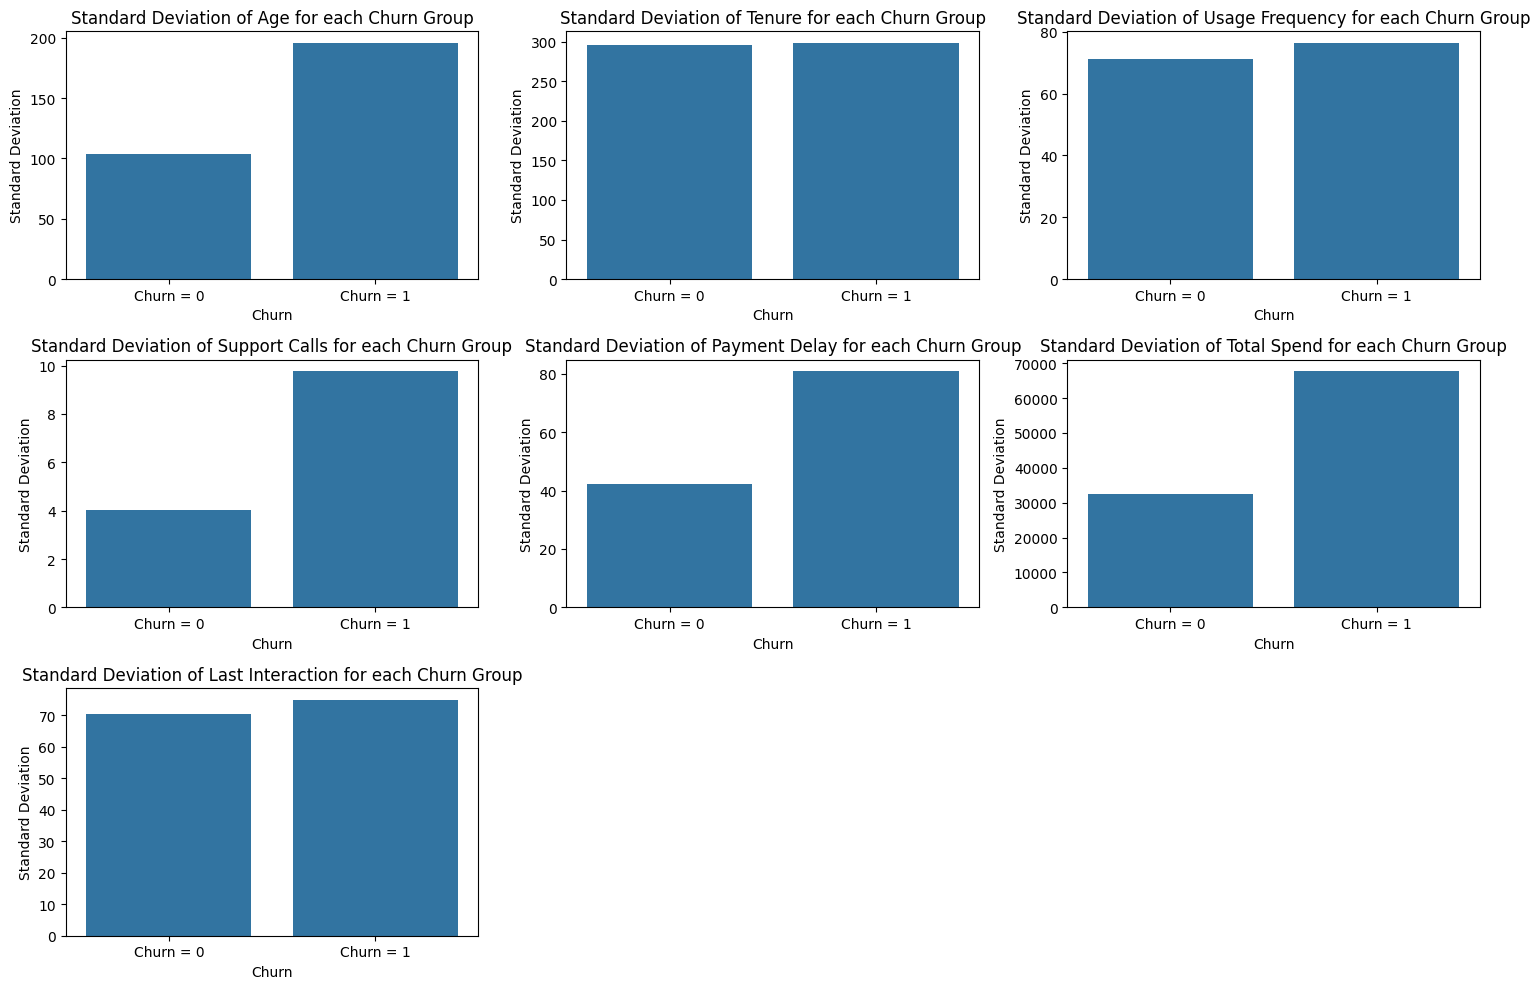

In [11]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns_drop_churn):
    print(i, column)
    # คำนวณ Standard Deviation สำหรับแต่ละกลุ่ม (ใช้ std ในที่นี้เพราะ Variance คือ std^2)
    std_group_0 = full_df[full_df['Churn'] == 0][column].var()
    std_group_1 = full_df[full_df['Churn'] == 1][column].var()

    print(f"Standard Deviation for Churn = 0 in {column}: {std_group_0.round(3)}")
    print(f"Standard Deviation for Churn = 1 in {column}: {std_group_1.round(3)}")
    print("-"*50)

    # สร้าง DataFrame สำหรับแสดงผล
    variance_df = pd.DataFrame({
        'Churn': ['Churn = 0', 'Churn = 1'],
        'Standard Deviation': [std_group_0, std_group_1]
    })

    # สร้าง subplot
    plt.subplot(3, 3, i+1)  # ปรับความยืดหยุ่นใน subplot
    sns.barplot(x='Churn', y='Standard Deviation', data=variance_df)
    plt.title(f'Standard Deviation of {column} for each Churn Group')
    plt.tight_layout()  # ให้ layout ของกราฟดูดีขึ้น

plt.show()


In [12]:
# stat 
# chi2 -> category_column

from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import pandas as pd

print(numerical_columns_drop_churn)


p_values = {}

# สำหรับ Categorical Columns ใช้ Chi-Square test กับ 'Churn'
for column in categorical_columns:
    contingency_table = pd.crosstab(train_df[column], train_df['Churn'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    p_values[column] = p_value
    # print(contingency_table)
    # print("p_value : ", p_value)
    # print("-"*30)

# สำหรับ Numerical Columns ใช้ ANOVA กับ 'Churn'
for column in numerical_columns_drop_churn:
    churn_0 = full_df[full_df['Churn'] == 0][column]
    churn_1 = full_df[full_df['Churn'] == 1][column]
    _, p_value = mannwhitneyu(churn_0, churn_1)
    p_values[column] = p_value
    # print(train_df[train_df['Churn'] == 0][column])

# # แสดงค่า p-value ของแต่ละ column
for col, p_val in p_values.items():
    print(f"Column: {col}, P-value: {p_val}")

# p_values = pd.DataFrame(p_values)



Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction'],
      dtype='object')
Column: Gender, P-value: 0.0
Column: Subscription Type, P-value: 3.6452152042998097e-41
Column: Contract Length, P-value: 0.0
Column: Age, P-value: 0.0
Column: Tenure, P-value: 7.953624484854165e-52
Column: Usage Frequency, P-value: 1.0043410800132667e-307
Column: Support Calls, P-value: 0.0
Column: Payment Delay, P-value: 0.0
Column: Total Spend, P-value: 0.0
Column: Last Interaction, P-value: 0.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

numerical_columns_drop_churn

# สร้าง Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns_drop_churn),  # Scaling สำหรับตัวเลข
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # One-Hot Encoding สำหรับ Categorical
    ]
)
numerical_columns_drop_churn


Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction'],
      dtype='object')

In [14]:
full_df = full_df.dropna()

# แยก features และ target
X = full_df.drop(columns=['Churn'])
y = full_df['Churn']

# แบ่งข้อมูลเป็น Train และ Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=1, max_iter=1000))
])

# Train Model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=1))])

In [15]:
# X_test = test_df.drop(columns=['Churn'])
# y_test = test_df['Churn']
# ทำนายผล
# คำนวณ Probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # ความน่าจะเป็นที่เป็นคลาส 1

# กำหนด threshold
threshold = 0.50  # ตัวอย่าง threshold
y_pred_threshold = (y_probs >= threshold).astype(int)  # ทำนายโดยใช้ threshold ที่กำหนด

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred_threshold)
print("Accuracy with threshold:", accuracy)

classification_rep = classification_report(y_test, y_pred_threshold)
print("Classification Report with threshold:\n", classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix with threshold:\n", conf_matrix)

Accuracy with threshold: 0.8497314630316306
Classification Report with threshold:
               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83     67483
         1.0       0.88      0.85      0.86     84079

    accuracy                           0.85    151562
   macro avg       0.85      0.85      0.85    151562
weighted avg       0.85      0.85      0.85    151562

Confusion Matrix with threshold:
 [[57287 10196]
 [12579 71500]]


In [16]:
# X = full_df.drop(columns=['Churn'])
# y = full_df[["Churn"]]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)\

# test_data = full_df.head(10)

# model_test = joblib.load(r"C:\Users\natta\OneDrive\Desktop\file\churnalyzer_app\churn_analyzer.pkl")
y_probs = model.predict_proba(X_test)[:, 1]  # ความน่าจะเป็นที่เป็นคลาส 1

# กำหนด threshold
threshold = 0.5  # ตัวอย่าง threshold
y_pred_threshold = (y_probs >= threshold).astype(int)  # ทำนายโดยใช้ threshold ที่กำหนด

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred_threshold)
print("Accuracy with threshold:", accuracy)
print(y_test, y_probs)

Accuracy with threshold: 0.8497314630316306
259831    0.0
224757    1.0
396084    0.0
12539     1.0
47518     1.0
         ... 
5922      1.0
368614    0.0
258364    0.0
422785    0.0
316703    0.0
Name: Churn, Length: 151562, dtype: float64 [0.4571071  0.99528399 0.13309287 ... 0.08025393 0.30376193 0.0995301 ]


In [17]:
test_data = full_df.sample(n=10)  # random_state ใช้สำหรับการสุ่มซ้ำได้
test_data
x_df = test_data.drop(columns=['Churn'])
y_df = test_data['Churn']

y_probs = model.predict_proba(x_df)[:, 1]  # ความน่าจะเป็นที่เป็นคลาส 1

# กำหนด threshold
threshold = 0.5  # ตัวอย่าง threshold
y_pred_threshold = (y_probs >= threshold).astype(int)  # ทำนายโดยใช้ threshold ที่กำหนด

# Evaluate Model
accuracy = accuracy_score(y_df, y_pred_threshold)
print("Accuracy with threshold:", accuracy)
print(y_df, y_probs)
x_df

Accuracy with threshold: 0.6
21576     0.0
405459    0.0
283425    0.0
55731     1.0
78317     1.0
308887    0.0
54370     1.0
140627    1.0
30004     1.0
18201     0.0
Name: Churn, dtype: float64 [0.98511813 0.54562941 0.10029687 0.9734406  0.75583601 0.08867922
 0.97067609 0.90082424 0.28965805 0.89723397]


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
21576,21577.0,63.0,Female,36.0,29.0,7.0,4.0,Basic,Monthly,524.00,25.0
405459,412574.0,40.0,Male,24.0,10.0,3.0,18.0,Standard,Quarterly,697.57,30.0
283425,290539.0,46.0,Male,37.0,30.0,2.0,7.0,Basic,Annual,881.38,17.0
55731,55732.0,53.0,Female,51.0,16.0,9.0,16.0,Basic,Quarterly,501.00,16.0
78317,80306.0,31.0,Male,23.0,27.0,5.0,18.0,Basic,Annual,436.00,19.0
308887,316002.0,46.0,Male,3.0,9.0,0.0,12.0,Standard,Quarterly,900.91,20.0
54370,54371.0,50.0,Male,59.0,25.0,7.0,30.0,Standard,Monthly,878.00,3.0
140627,145353.0,58.0,Male,21.0,4.0,4.0,9.0,Premium,Monthly,687.00,22.0
30004,30013.0,30.0,Female,28.0,30.0,2.0,7.0,Premium,Quarterly,457.00,7.0
18201,18202.0,33.0,Female,23.0,28.0,9.0,25.0,Premium,Annual,894.00,6.0


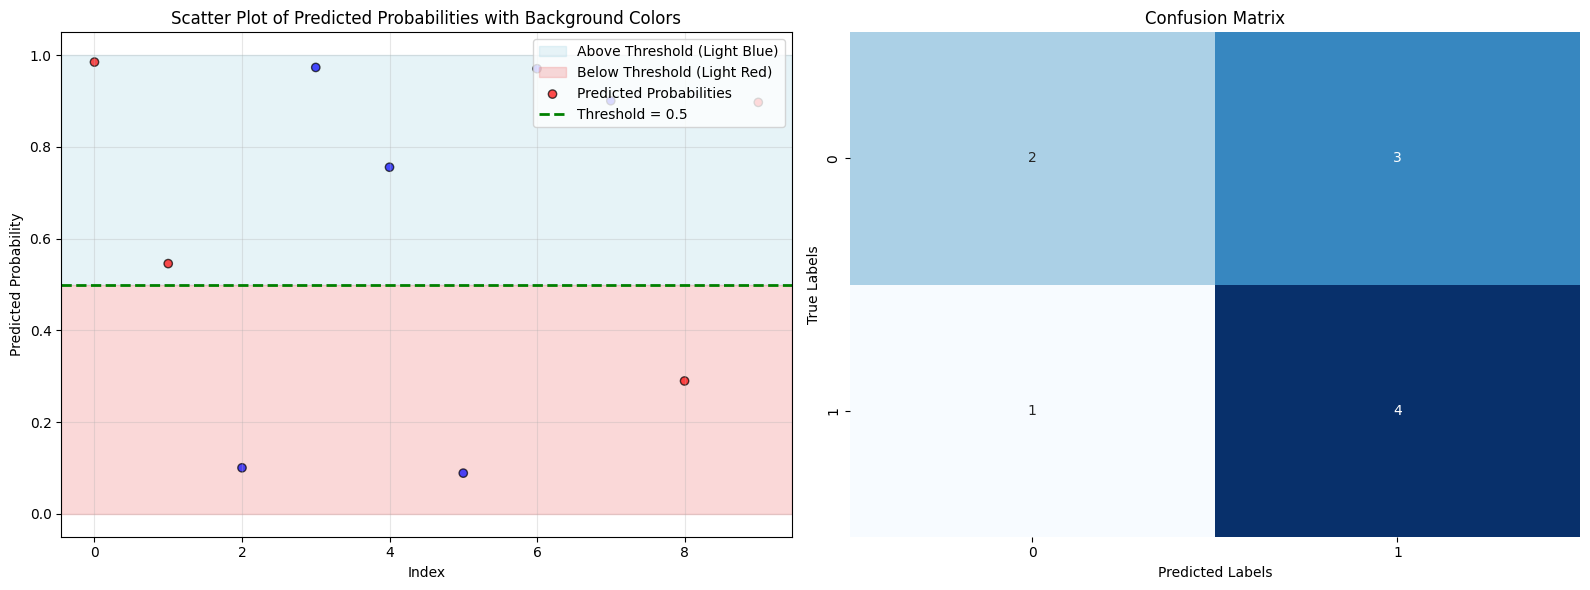

['churn_analyzer_model.joblib']

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ตรวจสอบขนาดของ y_probs และ colors
correct = (y_pred_threshold == y_df).to_numpy()  # เป็น True ถ้าทำนายถูก
colors = np.where(correct, 'blue', 'red')  # สีฟ้าสำหรับทำนายถูก, สีแดงสำหรับทำนายผิด

# กราฟ Scatter Plot พร้อมสีพื้นหลัง
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].axhspan(threshold, 1, color='lightblue', alpha=0.3, label='Above Threshold (Light Blue)')
axes[0].axhspan(0, threshold, color='lightcoral', alpha=0.3, label='Below Threshold (Light Red)')
axes[0].scatter(range(len(y_probs)), y_probs, c=colors, label='Predicted Probabilities', edgecolor='k', alpha=0.7)
axes[0].axhline(y=threshold, color='green', linestyle='--', linewidth=2, label=f'Threshold = {threshold}')

# การตกแต่งกราฟ Scatter Plot
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Predicted Probability')
axes[0].set_title('Scatter Plot of Predicted Probabilities with Background Colors')
axes[0].legend(loc='upper right')
axes[0].grid(alpha=0.3)

# กราฟ Confusion Matrix
conf_matrix = confusion_matrix(y_df, y_pred_threshold)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()
full_df_half = full_df.sample(n=int(full_df.shape[0]/2))
joblib.dump(full_df_half, 'full_df_half.joblib')
joblib.dump(model, 'churn_analyzer_model.joblib')

In [27]:
full_df.head()
full_df.shape, train_df.shape, test_df.shape, full_df_half.shape

((505206, 12), (440833, 12), (64374, 12), (252603, 12))